# Visualize RNA Input Data for Convolutional Neural Network
*Harrison LaBollita*

# Introduction
A convolutional neural networks (CNN) are a class of of neural networks that are designed specifically for image processing. Recently,[ _Zhang et. al. (2019)_ ](https://www.frontiersin.org/articles/10.3389/fgene.2019.00467/full) created a convolutional neural network to predict RNA secondary structures. I would like to implement there technique and further improve on their architecture by implementing more advanced machine learning techniques. However, to begin, I will recreate there method of transforming the input data of RNA sequences into matrices that can be interpretted as images to the CNN.

The common method of encoding the RNA sequence is one-hot encoding, however, one-hot encoding does contain implicit information about potential matching bases. This new method that was developed is a matrix that represents possible pairings at that position. It is build in the following way 

1. The pairing between A and U is set to 2, and the pairing weight between G and C is set to 3. Because the U-G pair is a wobble base pair, the pairing is set to $(0< x < 2)$. Here I choose 0.8. 
2. For any two positions $i$, $j$, we not only consider the pairing of these two bases, but also whether these two positions can form paired bases on the stem. 
3. Finally, we use a Gaussian function to weight the probability of two positions forming a pair based on how close the two positions $i$ and $j$ are to each other.

The complete alogrithm is illustrated in the paper, and I have implemented it in the next section below.

# Sequences to Matrices

Given an RNA sequences, I will turn it into a 2D image. The algorithm can be found on pg. 5 in [ _Zhang et. al. (2019)_ ](https://www.frontiersin.org/articles/10.3389/fgene.2019.00467/full). The code I have written to implement this algorithm is

In [2]:
import numpy as np

# Helper function for finding possible base pairs
def pairs(a, b, x):
    if a == 'A' and b == 'U' or a == 'U' and b == 'A':
        return 2.0
    elif a == 'G' and b == 'C' or a == 'C' and b == 'G':
        return 3.0
    elif a == 'U' and b == 'G' or a == 'G' and b == 'U':
        return x
    else:
        return 0

def RNAmatrix(seq):
    N = len(seq)
    rnaMatrix = np.zeros((N, N)) # Create empty matrx
    for i in range(N):
        for j in range(N):
            weight = 0
            rnaMatrix[i][j] = pairs(seq[i], seq[j], 0.8) # Can R_i pair with R_j ? 
            if rnaMatrix[i][j] > 0: # Yes
                alpha = 0
                while i - alpha >= 0 and j + alpha <N: # Loop through possible other pairs in the sequence
                    P = pairs(seq[i -alpha], seq[j + alpha], 0.8)
                    if P == 0:
                        break
                    else:
                        weight += np.exp(-0.5 * alpha * alpha) * P
                        alpha +=1
            if weight > 0: # Loop through possible other pairs in the sequence
                beta = 1
                while i + beta < N and j - beta >=0:
                    P = pairs(seq[i + beta], seq[j - beta], 0.8)
                    if P == 0:
                        break
                    else:
                        weight += np.exp(-0.5 * beta * beta) * P
                        beta +=1
            rnaMatrix[i][j] = weight # Set the matrix element equal to the weight 
    rnaMatrix /= np.amax(rnaMatrix) # Normalize the matrix between 0 and 1
    rnaMatrix = np.array(rnaMatrix) # Transform to array
    return rnaMatrix

# Visualization
First we begin by importing some of our data samples. These files contain 1000 RNA sequences and their corresponding dot bracket representations. We then transform all of the RNA sequeneces into RNA matrices. Furthermore, we have also transformed the dot bracket representation into a two dimensional array. For example, given the dot bracket representation ((..)), I have transformed it into 

$$\begin{pmatrix}
    1 & 0 & 0\\
    1 & 0 & 0\\
    0 & 0 & 1\\
    0 & 0 & 1\\
    0 & 1 & 0\\
    0 & 1 & 0\\
\end{pmatrix}$$
The mapping can be tabularized as 

| Bracket | Vector   |
| :----:| :--------: |
| '('     | (1, 0 0) |
| ')'     | (0, 1, 0)|
|  '.'    | (0, 0, 1)|

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
import importData as data

source = '/Users/harrisonlabollita/Library/Mobile Documents/com~apple~CloudDocs/Arizona State University/Sulc group/src/code/test_src.txt'
target = '/Users/harrisonlabollita/Library/Mobile Documents/com~apple~CloudDocs/Arizona State University/Sulc group/src/code/test_tgt.txt'

sequences = data.getRNA(source)
dotBrackets = data.getDotBrackets(target)
rna2D = data.seqs2matrices(sequences)

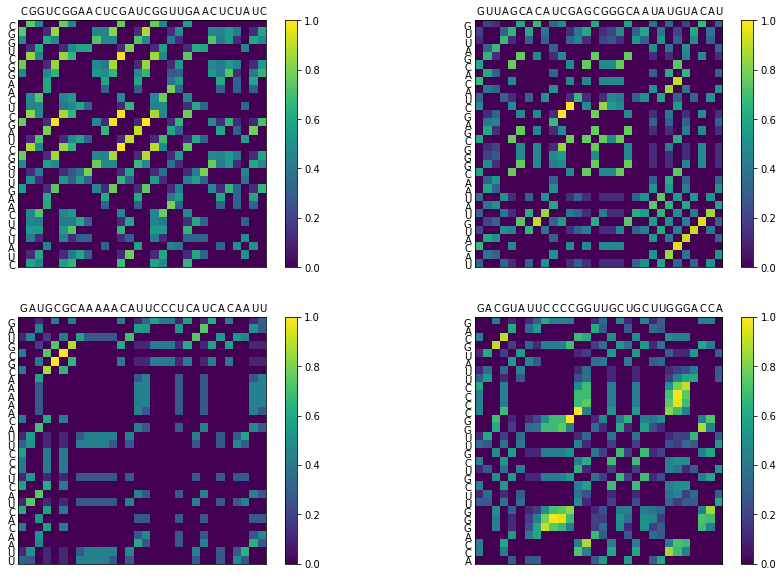

In [12]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
x_labels = sequences[0]
y_labels = sequences[0]
plot = ax[0,0].imshow(rna2D[0])
ax[0,0].set_xticks(np.arange(rna2D[0].shape[1]) + 0.15, minor=False)
ax[0,0].set_yticks(np.arange(rna2D[0].shape[0]) + 0.15, minor=False)
ax[0,0].xaxis.tick_top()
ax[0,0].xaxis.set_ticks_position('both')
ax[0,0].tick_params(axis='both', which='both', length=0)
ax[0,0].set_xticklabels(x_labels, minor=False)
ax[0,0].set_yticklabels(y_labels, minor=False)
fig.colorbar(plot, ax = ax[0,0])
x_labels = sequences[1]
y_labels = sequences[1]
plot = ax[0,1].imshow(rna2D[1])
ax[0,1].set_xticks(np.arange(rna2D[1].shape[1]) + 0.15, minor=False)
ax[0,1].set_yticks(np.arange(rna2D[1].shape[0]) + 0.15, minor=False)
ax[0,1].xaxis.tick_top()
ax[0,1].xaxis.set_ticks_position('both')
ax[0,1].tick_params(axis='both', which='both', length=0)
ax[0,1].set_xticklabels(x_labels, minor=False)
ax[0,1].set_yticklabels(y_labels, minor=False)
fig.colorbar(plot, ax = ax[0,1])
x_labels = sequences[2]
y_labels = sequences[2]
plot = ax[1,0].imshow(rna2D[2])
ax[1,0].set_xticks(np.arange(rna2D[2].shape[1]) + 0.15, minor=False)
ax[1,0].set_yticks(np.arange(rna2D[2].shape[0]) + 0.15, minor=False)
ax[1,0].xaxis.tick_top()
ax[1,0].xaxis.set_ticks_position('both')
ax[1,0].tick_params(axis='both', which='both', length=0)
ax[1,0].set_xticklabels(x_labels, minor=False)
ax[1,0].set_yticklabels(y_labels, minor=False)
fig.colorbar(plot, ax = ax[1,0])
x_labels = sequences[3]
y_labels = sequences[3]
plot = ax[1,1].imshow(rna2D[3])
ax[1,1].set_xticks(np.arange(rna2D[3].shape[1]) + 0.15, minor=False)
ax[1,1].set_yticks(np.arange(rna2D[3].shape[0]) + 0.15, minor=False)
ax[1,1].xaxis.tick_top()
ax[1,1].xaxis.set_ticks_position('both')
ax[1,1].tick_params(axis='both', which='both', length=0)
ax[1,1].set_xticklabels(x_labels, minor=False)
ax[1,1].set_yticklabels(y_labels, minor=False)
fig.colorbar(plot, ax = ax[1,1])
plt.show()